In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('credit_data_Two-wheeler loan.csv')
df.shape

(279856, 15)

In [3]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [5]:
df1 = df.copy()

In [6]:
cat_features = df1.select_dtypes(include='object')
cat_features

,Gender,Existing Customer,State,City,Employment Profile,Occupation
0,Male,No,Karnataka,Mysuru,Salaried,Doctor
1,Male,No,Karnataka,Bengaluru,Salaried,Software Engineer
2,Other,Yes,Uttar Pradesh,Kanpur,Salaried,Banker
3,Female,Yes,Karnataka,Bengaluru,Self-Employed,Contractor
4,Male,No,Karnataka,Mysuru,Salaried,Teacher
...,...,...,...,...,...,...
279851,Male,No,Tamil Nadu,Chennai,Salaried,Software Engineer
279852,Female,Yes,Karnataka,Bengaluru,Salaried,Civil Servant
279853,Female,No,Karnataka,Mysuru,Unemployed,NaN
279854,Male,No,Delhi,New Delhi,Salaried,Software Engineer


In [7]:
num_features = df1.select_dtypes(exclude='object')
num_features

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
0,31,36000,604,487,5,109373,221,90.943430,77
1,25,50000,447,386,2,150000,89,91.135253,43
2,62,178000,850,503,10,69099,110,40.000000,90
3,69,46000,668,349,6,150000,148,87.393365,86
4,52,132000,601,553,5,150000,157,66.158757,90
...,...,...,...,...,...,...,...,...,...
279851,69,61000,495,565,3,150000,14,90.300189,71
279852,45,124000,850,476,10,80341,86,78.960607,91
279853,33,71000,582,560,5,39851,101,95.000000,57
279854,67,191000,411,481,2,150000,111,56.109002,69


In [8]:
df1.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')

In [9]:
df1[cat_features.columns].nunique()

Gender                 3
Existing Customer      2
State                 10
City                  23
Employment Profile     5
Occupation            14
dtype: int64

In [10]:
df1.isnull().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

In [11]:
df1.drop(['City','State','Occupation'], axis =1,inplace = True)

In [12]:
cat_features = df1.select_dtypes(include = 'object')
cat_features.head()

,Gender,Existing Customer,Employment Profile
0,Male,No,Salaried
1,Male,No,Salaried
2,Other,Yes,Salaried
3,Female,Yes,Self-Employed
4,Male,No,Salaried


In [13]:
cat_features.nunique()

Gender                3
Existing Customer     2
Employment Profile    5
dtype: int64

In [14]:
cat_features['Employment Profile'].unique()

array(['Salaried', 'Self-Employed', 'Freelancer', 'Student', 'Unemployed'],
      dtype=object)

In [15]:
cat_values =  {"Gender": {"Male": 0, "Female": 1, "Other": 2},
               "Existing Customer": {"Yes": 1, "No": 0},
               'Employment Profile': {'Salaried':0, 'Self-Employed':1, 'Freelancer':3, 'Student':4, 'Unemployed':5}
    }

df1 = df1.replace(cat_values)
df1.head()


,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,LTV Ratio,Employment Profile,Profile Score
0,31,0,36000,604,487,5,109373,221,0,90.943430,0,77
1,25,0,50000,447,386,2,150000,89,0,91.135253,0,43
2,62,2,178000,850,503,10,69099,110,1,40.000000,0,90
3,69,1,46000,668,349,6,150000,148,1,87.393365,1,86
4,52,0,132000,601,553,5,150000,157,0,66.158757,0,90


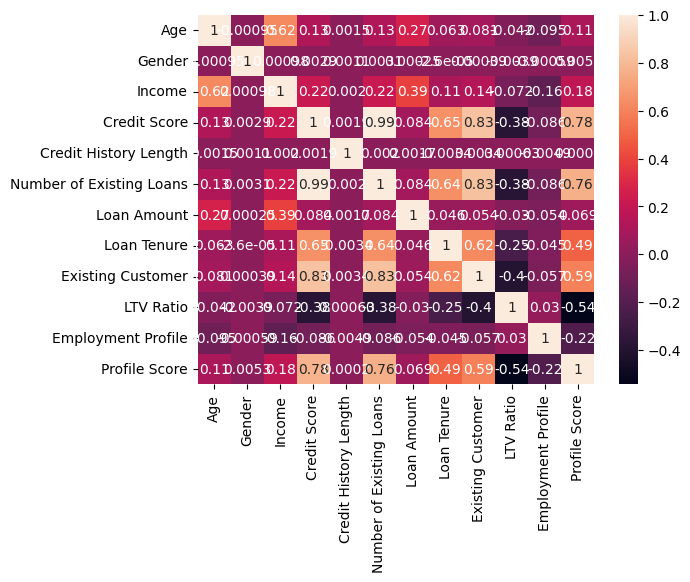

In [16]:
sns.heatmap(df1.corr(), annot =True)
plt.show()

<Axes: >

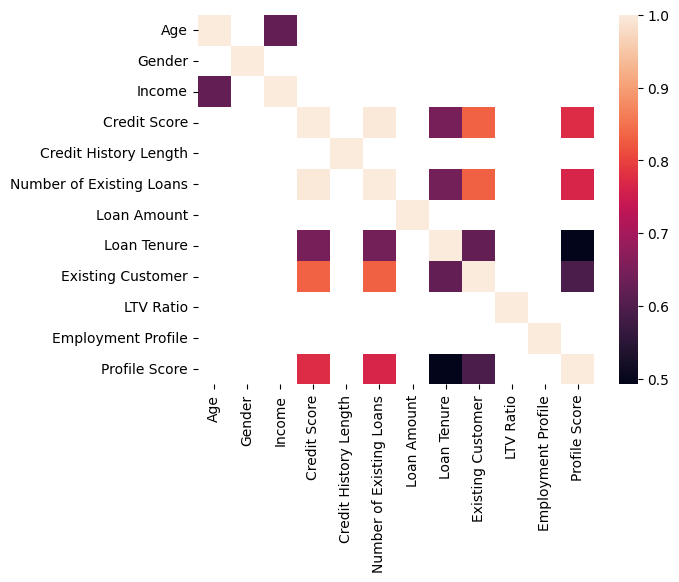

In [17]:
sns.heatmap(df1.corr()[df1.corr()>0.4])

In [18]:
df1.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'LTV Ratio', 'Employment Profile',
       'Profile Score'],
      dtype='object')

In [19]:
df1.drop(columns = ['Gender','Credit History Length','Loan Amount','LTV Ratio', 'Employment Profile'],axis =1 ,inplace =True)


/Users/saptarshipal/DATA/Two_wheeler_loan/venv_2w/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saptarshipal/DATA/Two_wheeler_loan/venv_2w/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saptarshipal/DATA/Two_wheeler_loan/venv_2w/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saptarshipal/DATA/Two_wheeler_loan/venv_2w/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

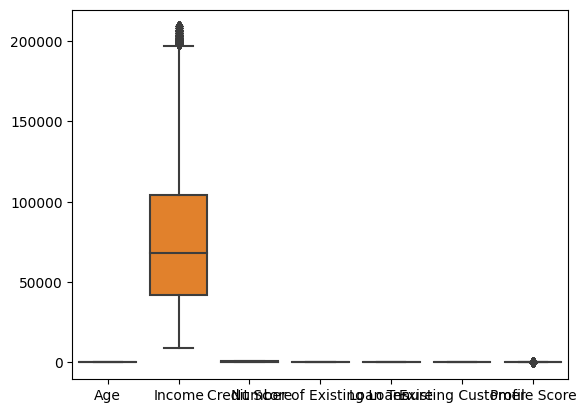

In [20]:
sns.boxplot(df1)
plt.show()

There is greater variance in some of the fields compared to the others. We will mitigate this by doing Scaling of the data.

In [21]:
df2 = df1.copy()

In [22]:
X = df2.drop(columns = ['Profile Score'])
y = df2['Profile Score']

In [23]:
y.shape

(279856,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=23,shuffle = False)


In [25]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(195899, 6) (195899,) (83957, 6) (83957,)


# Scaling

In [26]:
X_train.head()

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,Existing Customer
0,31,36000,604,5,221,0
1,25,50000,447,2,89,0
2,62,178000,850,10,110,1
3,69,46000,668,6,148,1
4,52,132000,601,5,157,0


In [27]:
# Scaling of X_train numeric data

X_train = X_train.copy()

trans = MinMaxScaler()

X_train[['Age','Income','Credit Score','Number of Existing Loans', 'Loan Tenure']] = trans.fit_transform(X_train[['Age','Income','Credit Score','Number of Existing Loans', 'Loan Tenure']])

X_train

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,Existing Customer
0,0.250000,0.135,0.552727,0.5,0.602305,0
1,0.134615,0.205,0.267273,0.2,0.221902,0
2,0.846154,0.845,1.000000,1.0,0.282421,1
3,0.980769,0.185,0.669091,0.6,0.391931,1
4,0.653846,0.615,0.547273,0.5,0.417867,0
...,...,...,...,...,...,...
195894,0.307692,0.270,0.838182,0.8,0.723343,1
195895,0.211538,0.195,0.518182,0.5,0.129683,0
195896,0.538462,0.480,0.720000,0.7,0.325648,1
195897,0.384615,0.245,0.176364,0.1,0.031700,0


In [28]:
# Scaling of X_test numeric data

X_test = X_test.copy()

trans = MinMaxScaler()

X_test[['Age','Income','Credit Score','Number of Existing Loans', 'Loan Tenure']] = trans.fit_transform(X_test[['Age','Income','Credit Score','Number of Existing Loans', 'Loan Tenure']])

X_test

,Age,Income,Credit Score,Number of Existing Loans,Loan Tenure,Existing Customer
195899,0.557692,0.515,0.227273,0.2,0.097983,0
195900,0.615385,0.120,0.225455,0.2,0.152738,0
195901,0.750000,0.160,0.058182,0.0,0.270893,0
195902,0.788462,0.165,0.290909,0.2,0.253602,0
195903,0.192308,0.025,0.481818,0.4,0.129683,0
...,...,...,...,...,...,...
279851,0.980769,0.260,0.354545,0.3,0.005764,0
279852,0.519231,0.575,1.000000,1.0,0.213256,1
279853,0.288462,0.310,0.512727,0.5,0.256484,0
279854,0.942308,0.910,0.201818,0.2,0.285303,0


In [29]:
#Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
pred_model_lr = model_lr.predict(X_test)
R2_lr = model_lr.score(X_test,y_test)
rmse_lr = np.sqrt(np.mean((y_test - pred_model_lr)**2))

#Ridge"
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
pred_model_ridge = model_ridge.predict(X_test)
R2_ridge = model_ridge.score(X_test,y_test)
rmse_ridge = np.sqrt(np.mean((y_test - pred_model_ridge)**2))


#Lasso
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
pred_model_lasso = model_lasso.predict(X_test)
R2_lasso = model_lasso.score(X_test,y_test)
rmse_lasso = np.sqrt(np.mean((y_test - pred_model_lasso)**2))

#Least Angle Regression
model_lars = Lars(n_nonzero_coefs=1)
model_lars.fit(X_train,y_train)
pred_model_lars = model_lars.predict(X_test)
R2_lars = model_lars.score(X_test,y_test)
rmse_lars = np.sqrt(np.mean((y_test - pred_model_lars)**2))

#K-Nearest Neighbors
model_knn = KNeighborsRegressor()
model_knn.fit(X_train,y_train)
pred_model_knn = model_knn.predict(X_test)
R2_knn = model_knn.score(X_test,y_test)
rmse_knn = np.sqrt(np.mean((y_test - pred_model_knn)**2))

#Neural Network
model_nn = MLPRegressor()
model_nn.fit(X_train,y_train)
pred_model_nn = model_nn.predict(X_test)
R2_nn = model_nn.score(X_test,y_test)
rmse_nn = np.sqrt(np.mean((y_test - pred_model_nn)**2))

#Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
pred_model_dt = model_dt.predict(X_test)
R2_dt = model_dt.score(X_test,y_test)
rmse_dt = np.sqrt(np.mean((y_test - pred_model_dt)**2))

#Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
pred_model_rf = model_rf.predict(X_test)
R2_rf = model_rf.score(X_test,y_test)
rmse_rf = np.sqrt(np.mean((y_test - pred_model_rf)**2))

#Gradient Boosting

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train,y_train)
pred_model_gbr = model_gbr.predict(X_test)
R2_gbr = model_gbr.score(X_test,y_test)
rmse_gbr = np.sqrt(np.mean((y_test - pred_model_gbr)**2))

In [30]:
Model_score = pd.DataFrame({'Model': [
    "LinearRegression",
    "Ridge",
    "Lasso",
    "Lars",   
    "KNeighborsRegressor",
    "Neural Network",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting"
]
,'Acronym':[model_lr,model_ridge,model_lasso,model_lars,model_knn,model_nn,model_dt,model_rf,model_gbr
    
]
,'R2':[R2_lr,R2_ridge,R2_lasso,R2_lars,R2_knn,R2_nn,R2_dt,R2_rf,R2_gbr
       ]
,'rmse': [rmse_lr,rmse_ridge,rmse_lasso,rmse_lars,rmse_knn,rmse_nn,rmse_dt,rmse_rf,rmse_gbr
    ]}).sort_values(by=['R2','rmse'],ascending=[False,True]).reset_index()

Model_score

,index,Model,Acronym,R2,rmse
0,7,Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",0.924278,6.728159
1,6,Decision Tree,DecisionTreeRegressor(),0.914710,7.140625
2,4,KNeighborsRegressor,KNeighborsRegressor(),0.699087,13.412402
3,8,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.653685,14.388722
4,5,Neural Network,MLPRegressor(),0.652043,14.422779
5,0,LinearRegression,LinearRegression(),0.613985,15.191077
6,1,Ridge,Ridge(),0.613983,15.191112
7,2,Lasso,Lasso(),0.581865,15.810463
8,3,Lars,Lars(n_nonzero_coefs=1),0.226988,21.497084


In [31]:
best_model = Model_score['Acronym'][0]
print("The bestmodel as per the scores is " + str(best_model) + '.')
pred_values = best_model.predict(X_test)

The bestmodel as per the scores is RandomForestRegressor().


In [32]:
model_compare_pred = pd.DataFrame({'y_test': y_test, 'Prediction values': pred_values})
model_compare_pred

,y_test,Prediction values
195899,56,58.03
195900,54,53.59
195901,36,36.67
195902,44,48.77
195903,50,87.24
...,...,...
279851,71,70.81
279852,91,93.43
279853,57,85.12
279854,69,65.52
